📘 **Note Format Guide**

This format serves as a structured guide for organizing lecture content, personal interpretation, experiments, and study-related questions.

| Type | What It Means | When I Use It |
|------|----------------|----------------|
| 📝 Lecture | Original material from the professor’s notes | When I’m referencing core concepts or provided code |
| 🗣️ In-Class Note | Verbal explanations shared during the lecture | When I want to record something the professor said in class but didn’t include in the official notes |
| ✍️ My Note | My thoughts, interpretations, or additional explanations | When I reflect on or explain something in my own words |
| 🔬 Experiment | Code I tried out or changed to explore further | When I test variations or go beyond the original example |
| ❓ Question | Questions I had while studying | When I want to revisit or research something more deeply |

📝
🗣️
✍️
🔬
❓

# 1. 강의노트 원본 및 영상 링크

[https://guebin.github.io/DL2025/posts/02wk-2.html](https://guebin.github.io/DL2025/posts/02wk-2.html)

# 2. Imports 📝

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

# 3. 선택학습: 데이터시각화 📝

`-` 데이터시각화2023: <https://guebin.github.io/DV2023/>

- 01wk-2: <https://guebin.github.io/DV2023/posts/01wk-2.html>
- 02wk-1: <https://guebin.github.io/DV2023/posts/02wk-1.html>

🗣️ 시각화 코드를 이해하고 싶으면 학습 추천

# 4. 파라메터의 학습과정 음미 📝

In [4]:
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
eps = torch.randn(100)*0.5
X = torch.stack([torch.ones(100),x],axis=1)
W = torch.tensor([[2.5],[4.0]])
y = X@W + eps.reshape(100,1)
x = X[:,[1]]

In [5]:
# 지난시간복습
# 지도학습문제: (x,y) 관찰하고 x -> y 인 패턴을 찾는 문제 (지도학습문제, supervised learning) 
# 모델링: (x,y) 관찰을 해보니까 scatter plot이 직선의 모양을 하고 있음.. --> 패턴이 직선이겠네? --> y=X@W+ϵ
## - 모델: y=X@W+ϵ // y 물결 X@W 
# 학습: 결국 회귀분석문제는 What을 찾는 문제 // 파라메터 What의 값을 update하는 과정을 학습
# 학습의방법? 
# 1. yhat을 구한다. <-- 모델링 (도메인지식이 정통한 어떤 사람) 
# 2. loss를 계산한다. <-- 손실함수를 설계 (통계) 
# 3. loss미분한다. <-- 미분을 계산하는 torch와 같은 프로그램이 있어야함 (컴퓨터공학과)
# 4. update한다. <-- 업데이트공식이 있었음. 이걸 알아야함. (산공)

🗣️(

- 모델 (직선)
    - 통계: $y=X@W + \epsilon$
    - 비통계: $y \approx X@W$
- 학습 (결과는 동일하나 느낌이 약간 다름)
    - 통계: parameter를 estimation (전체 공간에서 점으로 하나를 찍음, 신뢰구간으로 보완)
    - 비통계: parameter를 learning[일단 하나 선택하고 update] (신뢰구간 불가능-오차항이 없어서)

In [6]:
What = torch.tensor([[-5.0], [10.0]], requires_grad=True)
yhat = X@What # step1
loss = torch.sum((yhat-y)**2) # step2
loss.backward() # step3
What.data = What.data - 0.001*What.grad # step4
What.grad = None

- torch의 장점
    - 미분 가능 (미분 안 할거면 numpy 쓰면 됨)
    - GPU 사용 가능 

In [7]:
What.data

tensor([[-3.6577],
        [ 8.8111]])

- 업데이트된 결과를 가지고 step1부터 다시 반복

In [57]:
yhat = X@What # step1
loss = torch.sum((yhat-y)**2) # step2
loss.backward() # step3
What.data = What.data - 0.001*What.grad # step4
What.grad = None

In [58]:
What.data

tensor([[2.4075],
        [4.0276]])

- 위 두 코드를 반복하다보면 어느 순간 결과가 빨리 변하지 않는 느낌
    - 10번 넘게 반복한 결과
    - True 값이 이 근처

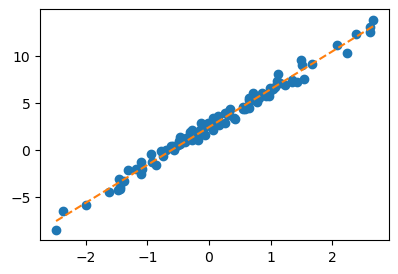

In [60]:
plt.plot(x,y,'o') # observed data
plt.plot(x,yhat.data,'--') # 추정값

- 중간 과정을 아래와 같이 살펴보려고 함
    - 결과를 보기 쉽게 하려고 벡터화: .reshpae(-1)
    - 두 번째 코드는 업데이트 계산 과정을 보기 쉽게하려고 주석 처리 및 부호 수정

In [63]:
What = torch.tensor([[-5.0], [10.0]], requires_grad=True)

In [64]:
yhat = X@What
loss = torch.sum((yhat-y)**2)
print(loss)
loss.backward()
print(What.data.reshape(-1)) # 수정전
print(What.grad.reshape(-1)) # 기울기값
print(What.grad.reshape(-1)*1/1000) # 기울기값*학습률
What.data = What.data - 0.001*What.grad
print(What.data.reshape(-1)) # 수정후
What.grad = None

tensor(8587.6875, grad_fn=<SumBackward0>)
tensor([-5., 10.])
tensor([-1342.2524,  1188.9305])
tensor([-1.3423,  1.1889])
tensor([-3.6577,  8.8111])


In [66]:
What = torch.tensor([[-5.0], [10.0]], requires_grad=True)

In [67]:
yhat = X@What
loss = torch.sum((yhat-y)**2)
print(loss)
loss.backward()
print(What.data.reshape(-1)) # 수정전
#print(What.grad.reshape(-1)) # 기울기값
print(-What.grad.reshape(-1)*1/1000) # 기울기값*학습률
What.data = What.data - 0.001*What.grad
print(What.data.reshape(-1)) # 수정후
What.grad = None

tensor(8587.6875, grad_fn=<SumBackward0>)
tensor([-5., 10.])
tensor([ 1.3423, -1.1889])
tensor([-3.6577,  8.8111])


- 반복하며 결과 비교 ✍️

```
tensor(8587.6875, grad_fn=<SumBackward0>)
tensor([-5., 10.])
tensor([ 1.3423, -1.1889])
tensor([-3.6577,  8.8111])
```

```
tensor(5675.2104, grad_fn=<SumBackward0>)
tensor([-3.6577,  8.8111])
tensor([ 1.1029, -0.9499])
tensor([-2.5548,  7.8612])
```

```
tensor(3755.6375, grad_fn=<SumBackward0>)
tensor([-2.5548,  7.8612])
tensor([ 0.9056, -0.7596])
tensor([-1.6492,  7.1016])
```

In [69]:
yhat = X@What
loss = torch.sum((yhat-y)**2)
print(loss)
loss.backward()
print(What.data.reshape(-1)) # 수정전
#print(What.grad.reshape(-1)) # 기울기값
print(-What.grad.reshape(-1)*1/1000) # 기울기값*학습률
What.data = What.data - 0.001*What.grad
print(What.data.reshape(-1)) # 수정후
What.grad = None

tensor(3755.6375, grad_fn=<SumBackward0>)
tensor([-2.5548,  7.8612])
tensor([ 0.9056, -0.7596])
tensor([-1.6492,  7.1016])


)🗣️

## A. print 

In [70]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
alpha = 0.001
print(f"시작값 = {What.data.reshape(-1)}")
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - alpha * What.grad
    print(f'loss = {loss:.2f} \t 업데이트폭 = {-alpha * What.grad.reshape(-1)} \t 업데이트결과: {What.data.reshape(-1)}')
    What.grad = None

시작값 = tensor([-5., 10.])
loss = 8587.69 	 업데이트폭 = tensor([ 1.3423, -1.1889]) 	 업데이트결과: tensor([-3.6577,  8.8111])
loss = 5675.21 	 업데이트폭 = tensor([ 1.1029, -0.9499]) 	 업데이트결과: tensor([-2.5548,  7.8612])
loss = 3755.64 	 업데이트폭 = tensor([ 0.9056, -0.7596]) 	 업데이트결과: tensor([-1.6492,  7.1016])
loss = 2489.58 	 업데이트폭 = tensor([ 0.7431, -0.6081]) 	 업데이트결과: tensor([-0.9061,  6.4935])
loss = 1654.04 	 업데이트폭 = tensor([ 0.6094, -0.4872]) 	 업데이트결과: tensor([-0.2967,  6.0063])
loss = 1102.32 	 업데이트폭 = tensor([ 0.4995, -0.3907]) 	 업데이트결과: tensor([0.2028, 5.6156])
loss = 737.84 	 업데이트폭 = tensor([ 0.4091, -0.3136]) 	 업데이트결과: tensor([0.6119, 5.3020])
loss = 496.97 	 업데이트폭 = tensor([ 0.3350, -0.2519]) 	 업데이트결과: tensor([0.9469, 5.0501])
loss = 337.71 	 업데이트폭 = tensor([ 0.2742, -0.2025]) 	 업데이트결과: tensor([1.2211, 4.8477])
loss = 232.40 	 업데이트폭 = tensor([ 0.2243, -0.1629]) 	 업데이트결과: tensor([1.4454, 4.6848])
loss = 162.73 	 업데이트폭 = tensor([ 0.1834, -0.1311]) 	 업데이트결과: tensor([1.6288, 4.5537])
loss = 116.63

- 🗣️
    - loss만 보면 점점 감소함, 갈수록 감소하는 폭도 작아지며 26 근처로 수렴
    - 업데이트 폭도 처음에는 컸다가 감소
    - 이에 따라 업데이트 결과도 갈수록 잘 안 바뀜

## B. 시각화 -- yhat의 관점에서!

🗣️(

In [73]:
What = torch.tensor([[-5.0], [10.0]], requires_grad=True)

In [74]:
yhat = X@What
loss = torch.sum((yhat-y)**2)
loss.backward()
What.data = What.data - 0.001*What.grad
What.grad = None

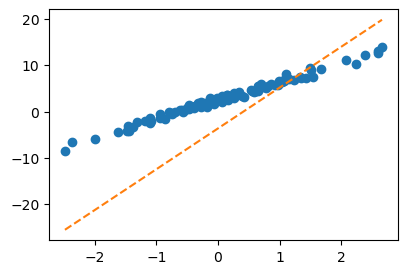

In [75]:
plt.plot(x,y,'o')
plt.plot(x, (X@What).data, '--', color="C1") # 선 색깔 주황색 고정

- 아래 코드를 반복하며 지켜보면 선이 변화하는 것을 볼 수 있음 (밑의 그래프는 여러번 반복한 최종 결과)

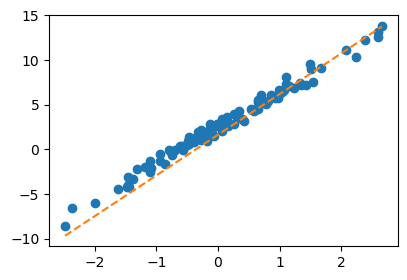

In [85]:
yhat = X@What
loss = torch.sum((yhat-y)**2)
loss.backward()
What.data = What.data - 0.001*What.grad
What.grad = None
plt.plot(x,y,'o')
plt.plot(x, (X@What).data, '--', color="C1")

- 한 가지 아쉬운 점: 중간 과정의 그래프가 사라짐

In [89]:
What = torch.tensor([[-5.0], [10.0]], requires_grad=True)

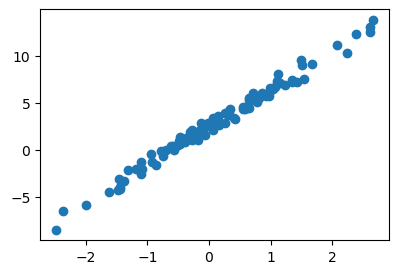

In [90]:
plt.plot(x,y,'o')
fig = plt.gcf() # 중간 그림을 저장 (호출 가능) get current figure

In [92]:
ax = fig.gca() # get current axes (axes: axis의 복수형, 여기서는 x축,y축 모두를 지칭)
yhat = X@What
loss = torch.sum((yhat-y)**2)
loss.backward()
What.data = What.data - 0.001*What.grad
What.grad = None
ax.plot(x, (X@What).data, '--', color="C1") # plt를 ax로 수정

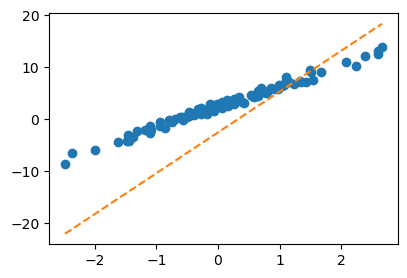

In [93]:
fig # 1번 실행

- 1번 더 실행하면 겹쳐짐

In [95]:
ax = fig.gca() # get current axes (axes: axis의 복수형, 여기서는 x축,y축 모두를 지칭)
yhat = X@What
loss = torch.sum((yhat-y)**2)
loss.backward()
What.data = What.data - 0.001*What.grad
What.grad = None
ax.plot(x, (X@What).data, '--', color="C1") # plt를 ax로 수정

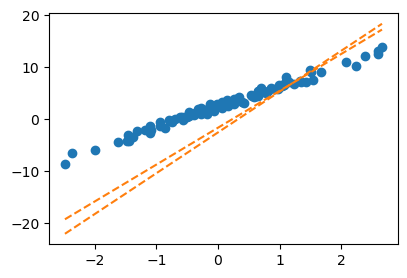

In [96]:
fig # 1번 더 실행 (겹쳐짐)

- 초기화 후 반복하면 업데이트된 폭을 볼 수 있음 (점점 줄어드는 것 같음)

In [97]:
What = torch.tensor([[-5.0], [10.0]], requires_grad=True)

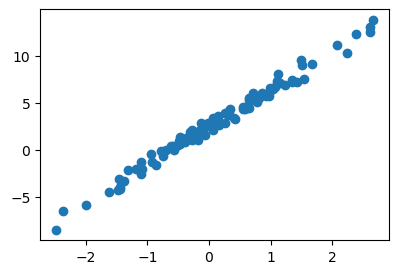

In [98]:
plt.plot(x,y,'o')
fig = plt.gcf()

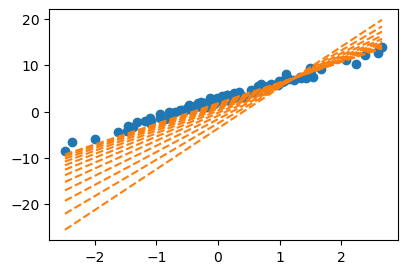

In [110]:
ax = fig.gca()
yhat = X@What
loss = torch.sum((yhat-y)**2)
loss.backward()
What.data = What.data - 0.001*What.grad
What.grad = None
ax.plot(x, (X@What).data, '--', color="C1")
fig

- 제목을 넣을 수도 있음 (set_title, 단순 문자열 아니여도 가능)

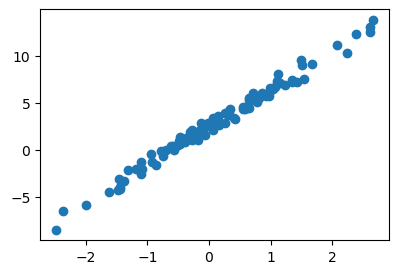

In [114]:
What = torch.tensor([[-5.0], [10.0]], requires_grad=True)

plt.plot(x,y,'o')
fig = plt.gcf()

In [115]:
for epoc in range(20):
    ax = fig.gca()
    yhat = X@What
    loss = torch.sum((yhat-y)**2)
    loss.backward()
    What.data = What.data - 0.001*What.grad
    What.grad = None
    ax.plot(x, (X@What).data, '--', color="C1")
    ax.set_title(What.data.reshape(-1))
    fig

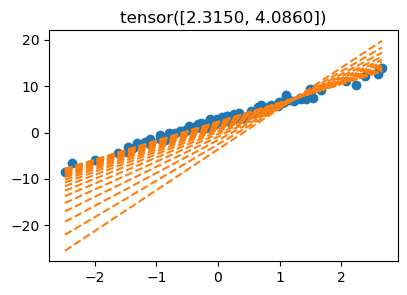

In [116]:
fig

)🗣️

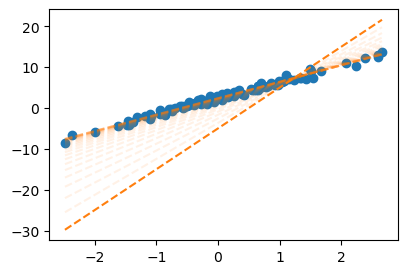

In [117]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
alpha = 0.001
plt.plot(x,y,'o',label = "observed")
fig = plt.gcf()
ax = fig.gca()
ax.plot(x,X@What.data,'--',color="C1")
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - alpha * What.grad
    ax.plot(x,X@What.data,'--',color="C1",alpha=0.1)
    What.grad = None

🗣️ alpha: 겹쳐지면 진해짐

## C. 시각화 -- loss의 관점에서!! 

🗣️(

In [118]:
def plot_loss():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    w0 = np.arange(-6, 11, 0.5) 
    w1 = np.arange(-6, 11, 0.5)
    W1,W0 = np.meshgrid(w1,w0)
    LOSS=W0*0
    for i in range(len(w0)):
        for j in range(len(w1)):
            LOSS[i,j]=torch.sum((y-w0[i]-w1[j]*x)**2)
    ax.plot_surface(W0, W1, LOSS, rstride=1, cstride=1, color='b',alpha=0.1)
    ax.azim = 30  ## 3d plot의 view 조절 
    ax.dist = 8   ## 3d plot의 view 조절 
    ax.elev = 5   ## 3d plot의 view 조절 
    ax.set_xlabel(r'$w_0$')  # x축 레이블 설정
    ax.set_ylabel(r'$w_1$')  # y축 레이블 설정
    ax.set_xticks([-5,0,5,10])  # x축 틱 간격 설정
    ax.set_yticks([-5,0,5,10])  # y축 틱 간격 설정
    plt.close(fig)  # 자동 출력 방지
    return fig

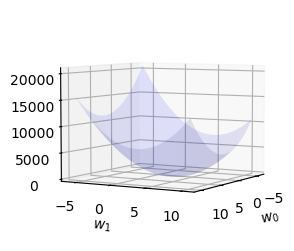

In [119]:
fig = plot_loss()
fig # loss_fn(w0hat, w1hat)을 z에 찍음

In [120]:
# 손실 8587.6875 를 계산하는 또 다른 방식
def l(w0hat,w1hat):
    yhat = w0hat + w1hat*x
    return torch.sum((y-yhat)**2)

In [121]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
What

tensor([[-5.],
        [10.]], requires_grad=True)

In [122]:
l(-5,10) # 손실 계산

tensor(8587.6875)

In [123]:
torch.sum((y-X@What)**2) # 다른 방법

tensor(8587.6875, grad_fn=<SumBackward0>)

In [124]:
yhat = -5 + 10*x
torch.sum((y-yhat)**2) # 다른 방법 2

tensor(8587.6875)

In [125]:
fig
ax = fig.gca()
ax.scatter(-5, 10, l(-5,10)) # 점 찍기

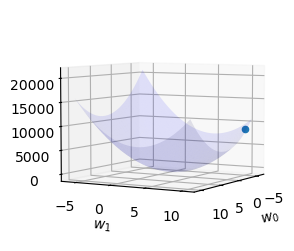

In [126]:
fig

In [127]:
fig
ax = fig.gca()
ax.scatter(-1, 3, l(-1,3)) # 다른 점 찍기

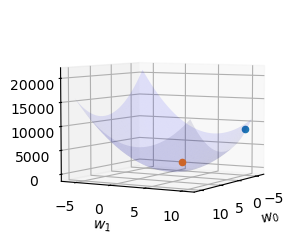

In [128]:
fig

- 위 과정을 반복하면 곡면을 그릴 수 있음
- 밑은 True 값 찍기

In [130]:
fig
ax = fig.gca()
ax.scatter(2.5, 4.0, l(2.5,4.0)) # True 값

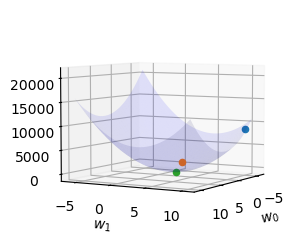

In [131]:
fig

- 밑에 정리된 코드 과정

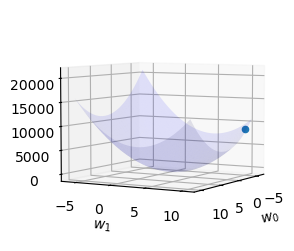

In [134]:
fig = plot_loss()
fig # loss_fn(w0hat,w1hat)
ax = fig.gca()
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
w0hat, w1hat = What.data.reshape(-1) # 언패킹
ax.scatter(w0hat, w1hat, l(w0hat, w1hat)) # x, y, z
fig # 최초의 직선에 대응하는 What 값

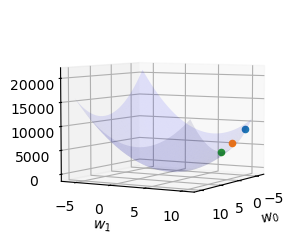

In [136]:
yhat = X@What
loss = torch.sum((y-yhat)**2)
loss.backward()
What.data = What.data - 0.001*What.grad
What.grad = None
w0hat, w1hat = What.data.reshape(-1)
ax.scatter(w0hat, w1hat, l(w0hat, w1hat))
fig # 반복 실행할수록 update됨

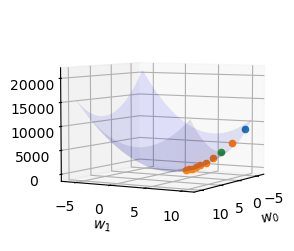

In [143]:
yhat = X@What
loss = torch.sum((y-yhat)**2)
loss.backward()
What.data = What.data - 0.001*What.grad
What.grad = None
w0hat, w1hat = What.data.reshape(-1)
ax.scatter(w0hat, w1hat, l(w0hat, w1hat), color="C1") # 앞으로는 주황색으로 색깔 고정
fig # 반복 실행할수록 점점 최소가 되는 쪽으로 진행됨

)🗣️

In [144]:
def plot_loss():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    w0 = np.arange(-6, 11, 0.5) 
    w1 = np.arange(-6, 11, 0.5)
    W1,W0 = np.meshgrid(w1,w0)
    LOSS=W0*0
    for i in range(len(w0)):
        for j in range(len(w1)):
            LOSS[i,j]=torch.sum((y-w0[i]-w1[j]*x)**2)
    ax.plot_surface(W0, W1, LOSS, rstride=1, cstride=1, color='b',alpha=0.1)
    ax.azim = 30  ## 3d plot의 view 조절 
    ax.dist = 8   ## 3d plot의 view 조절 
    ax.elev = 5   ## 3d plot의 view 조절 
    ax.set_xlabel(r'$w_0$')  # x축 레이블 설정
    ax.set_ylabel(r'$w_1$')  # y축 레이블 설정
    ax.set_xticks([-5,0,5,10])  # x축 틱 간격 설정
    ax.set_yticks([-5,0,5,10])  # y축 틱 간격 설정
    plt.close(fig)  # 자동 출력 방지
    return fig

In [145]:
# 손실 8587.6875 를 계산하는 또 다른 방식
def l(w0hat,w1hat):
    yhat = w0hat + w1hat*x
    return torch.sum((y-yhat)**2)

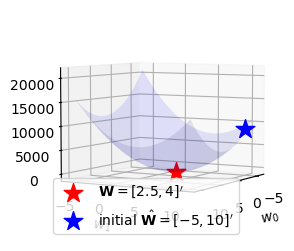

In [146]:
fig = plot_loss()
ax = fig.gca()
ax.scatter(2.5, 4, l(2.5,4), s=200, marker='*', color='red', label=r"${\bf W}=[2.5, 4]'$")
ax.scatter(-5, 10, l(-5,10), s=200, marker='*', color='blue', label=r"initial $\hat{\bf W}=[-5, 10]'$")
ax.legend()
fig

In [147]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
alpha = 0.001
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - 0.001 * What.grad
    w0,w1 = What.data.reshape(-1) 
    ax.scatter(w0,w1,l(w0,w1),s=5,marker='o',color='blue')
    What.grad = None

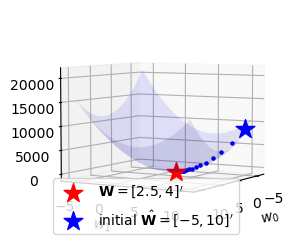

In [148]:
fig

- 🗣️
    - B의 시각화에서 최초의 직선에 대응하는 점이 파란색 점
    - 점들이 빨간색 점으로 이동하는 과정은 직선이 올라가는 과정에 대응

## D. 애니메이션 

In [149]:
from matplotlib import animation

In [150]:
plt.rcParams['figure.figsize'] = (7.5,2.5)
plt.rcParams["animation.html"] = "jshtml" 

In [151]:
def show_animation(alpha=0.001):
    ## 1. 히스토리 기록을 위한 list 초기화
    loss_history = [] 
    yhat_history = [] 
    What_history = [] 

    ## 2. 학습 + 학습과정기록
    What= torch.tensor([[-5.0],[10.0]],requires_grad=True)
    What_history.append(What.data.tolist())
    for epoc in range(30): 
        yhat=X@What ; yhat_history.append(yhat.data.tolist())
        loss=torch.sum((y-yhat)**2); loss_history.append(loss.item())
        loss.backward() 
        What.data = What.data - alpha * What.grad; What_history.append(What.data.tolist())
        What.grad = None    

    ## 3. 시각화 
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    #### ax1: yhat의 관점에서.. 
    ax1.plot(x,y,'o',label=r"$(x_i,y_i)$")
    line, = ax1.plot(x,yhat_history[0],label=r"$(x_i,\hat{y}_i)$") 
    ax1.legend()
    #### ax2: loss의 관점에서.. 
    w0 = np.arange(-6, 11, 0.5) 
    w1 = np.arange(-6, 11, 0.5)
    W1,W0 = np.meshgrid(w1,w0)
    LOSS=W0*0
    for i in range(len(w0)):
        for j in range(len(w1)):
            LOSS[i,j]=torch.sum((y-w0[i]-w1[j]*x)**2)
    ax2.plot_surface(W0, W1, LOSS, rstride=1, cstride=1, color='b',alpha=0.1)
    ax2.azim = 30  ## 3d plot의 view 조절 
    ax2.dist = 8   ## 3d plot의 view 조절 
    ax2.elev = 5   ## 3d plot의 view 조절 
    ax2.set_xlabel(r'$w_0$')  # x축 레이블 설정
    ax2.set_ylabel(r'$w_1$')  # y축 레이블 설정
    ax2.set_xticks([-5,0,5,10])  # x축 틱 간격 설정
    ax2.set_yticks([-5,0,5,10])  # y축 틱 간격 설정
    ax2.scatter(2.5, 4, l(2.5,4), s=200, marker='*', color='red', label=r"${\bf W}=[2.5, 4]'$")
    ax2.scatter(-5, 10, l(-5,10), s=200, marker='*', color='blue')
    ax2.legend()
    def animate(epoc):
        line.set_ydata(yhat_history[epoc])
        ax2.scatter(np.array(What_history)[epoc,0],np.array(What_history)[epoc,1],loss_history[epoc],color='grey')
        fig.suptitle(f"alpha = {alpha} / epoch = {epoc}")
        return line

    ani = animation.FuncAnimation(fig, animate, frames=30)
    plt.close()
    return ani

- 🗣️ alpha:
    - 학습률: update되는 폭 (ML 관점)
    - step size: 오른쪽 그림 함수 관점 (산업 공학 관점)

In [152]:
ani = show_animation(alpha=0.001)
ani

## E. 학습률에 따른 시각화 

`-` $\alpha$가 너무 작다면 비효율적임 

In [153]:
show_animation(alpha=0.0001)

- 🗣️ 0.001 -> 0.0001
    - 아까보다 가는 둥 마는 둥 함

`-` $\alpha$가 크다고 무조건 좋은건 또 아님

In [154]:
show_animation(alpha=0.0083)

- 🗣️ 0.001 -> 0.0083 (직접 찾은 숫자)
    - 처음부터 최소점을 지나버림 (직선이 점들 위로 바로 올라감) -> 바람직하지 않음
    - 이후 직선이 다시 점들 아래로 내려옴
    - 왔다갔다하면서 내려오는 것 같기는 하나 효율적인 느낌은 아님

`-` 수틀리면 수렴안할수도?? 

In [155]:
show_animation(alpha=0.0085)

- 🗣️ 0.001 -> 0.0085
    - 직전의 0.0083과 얼마 차이가 나지도 않는데
    - 이번에는 왔다갔다하면서 수렴하지도 않음
    - 오히려 갈수록 포물선 모양으로 점점 올라감

`-` 그냥 망할수도?? 

In [156]:
show_animation(alpha=0.01)

- 🗣️ 0.001 -> 0.01
    - 기울기가 무한대가 됨
    - 교훈: alpha를 잘 선택해야 수렴함

---

In [157]:
plt.rcdefaults()
plt.rcParams['figure.figsize'] = 4.5,3.0 

---

# 5. SSE $\to$ MSE 📝

🗣️(

- alpha = 0.001로 한 이유
    - 갖고 있는 값이 -5, 10인데 미분값이 -1342, 1188이라 일단 1000으로 나눔 

In [158]:
What = torch.tensor([[-5.0], [10.0]], requires_grad= True)
loss = torch.sum((y-X@What)**2)
loss.backward()
What.grad

tensor([[-1342.2524],
        [ 1188.9305]])

In [159]:
loss # 100개에 대해서 (yi - yihat)**2

tensor(8587.6875, grad_fn=<SumBackward0>)

- 개수가 많아지면 loss가 커지고 그에 따라 grad도 커지므로 alpha를 비례해서 작게 만들어야 함
- 잘 선택하는 방법은 많이 연구 중 (이론적인 방법은 없음)
- alpha를 잘 못 구하는 방법
    - loss에 SSE 사용 (데이터 개수가 많아지면 커짐)
- SSE보다는 데이터의 개수로 나눈 MSE를 사용

)🗣️

`-` 학습률을 잘 선택하는 것이 중요함 

`-` 손실함수를 SSE로 설정하면 학습률 선택이 비효율적 $\to$ SSE말고 MSE를 써야함 

🗣️(

```
loss = (y-XW)'(y-XW) # What을 편의상 W로 작성
=(y'-W'X')(y-XW)
=y'y - y'XW - W'X'y + W'X'XW

loss' = -2X'y + 2X'XW
회귀분석에서는 loss'=0으로 계산
정사각행렬(2x2)인 X'X의 역행렬이 있다고 치고 곱하면
W = (X'X)^{-1}X'y
```

In [162]:
torch.linalg.inv(X.T@X)@X.T@y # What or betahat(회귀분석)

tensor([[2.4459],
        [4.0043]])

- 위 방법은 함수가 어려워질수록 미분이 비효율적이고 점점 구할 수 없어짐
- 그래서 컴퓨터를 이용해 알고리즘으로 구하려고 함 (경사하강법)
- 회귀분석에서는 loss'=0이나 1/100*loss'=0이나 상관없기 때문에 (양변에 100곱하면 동일)
    - SSE로 푸나 MSE로 푸나 같음 -> 그냥 SSE로 계산
- 경사하강법에서는 MSE를 선택

)🗣️

***손실함수가 SSE일때코드***

In [163]:
What = torch.tensor([[-5.0],[10.0]],requires_grad = True)
for epoc in range(30):
    # step1: yhat 
    yhat = X@What 
    # step2: loss
    loss = torch.sum((y-yhat)**2)
    # step3: 미분
    loss.backward()
    # step4: update
    What.data = What.data - 0.001 * What.grad
    What.grad = None

In [164]:
What.data

tensor([[2.4290],
        [4.0144]])

***손실함수가 MSE일때코드***

In [165]:
What = torch.tensor([[-5.0],[10.0]],requires_grad = True)
for epoc in range(30):
    # step1: yhat 
    yhat = X@What 
    # step2: loss
    loss = torch.sum((y-yhat)**2)/100 # torch.mean((y-yhat)**2)
    # step3: 미분
    loss.backward()
    # step4: update
    What.data = What.data - 0.1 * What.grad
    What.grad = None

In [166]:
What.data

tensor([[2.4290],
        [4.0144]])

🗣️ loss에서 loss/100을 하면 loss'도 loss'/100이 됨 (What.grad/100) -> alpha는 100배 커져야 원래 수식과 전체 값이 동일해짐

# 6. 파이토치식 코딩패턴 (1) 📝

In [167]:
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
eps = torch.randn(100)*0.5
X = torch.stack([torch.ones(100),x],axis=1)
W = torch.tensor([[2.5],[4.0]])
y = X@W + eps.reshape(100,1)
x = X[:,[1]]

## A. 기본패턴

🗣️ SSE 말고 MSE로

In [168]:
## -- 외우세요!!! -- ##
What = torch.tensor([[-5.0],[10.0]],requires_grad = True)
for epoc in range(30):
    # step1: yhat 
    yhat = X@What 
    # step2: loss
    loss = torch.sum((y-yhat)**2)/100
    # step3: 미분
    loss.backward()
    # step4: update
    What.data = What.data - 0.1 * What.grad
    What.grad = None

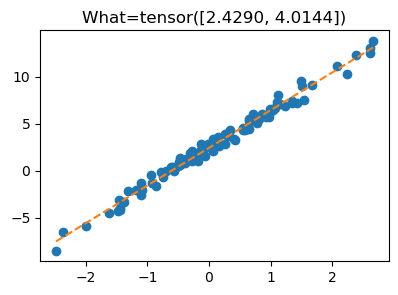

In [169]:
plt.plot(x,y,'o')
plt.plot(x,X@What.data,'--')
plt.title(f'What={What.data.reshape(-1)}');

## B. Step2의 수정 -- `loss_fn` 이용 

🗣️(

In [170]:
What = torch.tensor([[-5.0],[10.0]],requires_grad = True)

In [171]:
yhat=X@What

In [172]:
torch.sum((y-yhat)**2)/100 # MSE

tensor(85.8769, grad_fn=<DivBackward0>)

In [173]:
torch.mean((y-yhat)**2) # MSE

tensor(85.8769, grad_fn=<MeanBackward0>)

In [174]:
def loss_fn(yhat, y):
    return torch.mean((y-yhat)**2)

In [175]:
loss_fn(yhat,y)

tensor(85.8769, grad_fn=<MeanBackward0>)

- loss_fn 원리를 잘 모른다면 pytorch 함수 이용

In [176]:
loss_fn = torch.nn.MSELoss()
loss_fn(yhat,y) # 결과는 동일

tensor(85.8769, grad_fn=<MseLossBackward0>)

- 틀린 설명
    - torch.nn.MSELoss는 함수인데, "None -> MSE를 계산해주는 함수"인 함수
- 맞는 설명
    - torch.nn.MSELoss는 callable object를 생성하는 클래스  

)🗣️

In [177]:
What = torch.tensor([[-5.0],[10.0]],requires_grad = True)
loss_fn = torch.nn.MSELoss()
for epoc in range(30):
    # step1: yhat 
    yhat = X@What 
    # step2: loss
    #loss = torch.sum((y-yhat)**2)/100
    loss = loss_fn(yhat,y) # 여기서는 큰 상관없지만 습관적으로 yhat을 먼저넣는 연습을 하자!!
    # step3: 미분
    loss.backward()
    # step4: update
    What.data = What.data - 0.1 * What.grad
    What.grad = None

🗣️ loss_fn은 무조건 yhat 먼저

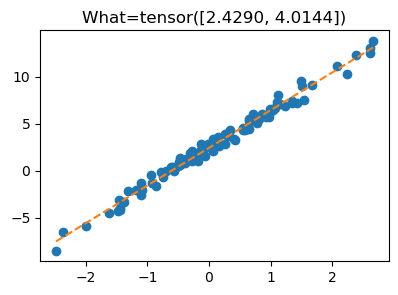

In [178]:
plt.plot(x,y,'o')
plt.plot(x,X@What.data,'--')
plt.title(f'What={What.data.reshape(-1)}');

## C. Step1의 수정 -- `net` 이용

🗣️ yhat = X@What도 알고 싶지 않다면 (네트워크 이용)

`# net` -- net 오브젝트란? 

원래 yhat을 이런식으로 구했는데 ~

In [179]:
What = torch.tensor([[-5.0],[10.0]],requires_grad = True)
yhat= X@What
yhat[:5]

tensor([[-29.8211],
        [-28.6215],
        [-24.9730],
        [-21.2394],
        [-19.7919]], grad_fn=<SliceBackward0>)

아래와 같은 방식으로 코드를 짜고 싶음.. 
```Python
yhat = net(X) # 
```

🗣️ X를 입력으로 받아 yhat을 출력하고 싶음

위와 같은 코드를 가능하게 하는 `net`은 torch에서 지원하고 아래와 같이 사용할 수 있음. 

🗣️(

In [181]:
# torch.nn.Linear?

```
net = torch.nn.Linear(
    in_features= ??,
    out_features= ??,
    bias= False # default는 True
)
```

- in_features: 입력(X)에 대한 차원 (features를 dimension으로 생각)

In [187]:
X.shape # 100은 관측값 개수에 따라 바뀔 수 있고, 2는 모형이 정해지면 안 바뀜

torch.Size([100, 2])

- out_features: 출력(y)에 대한 차원

In [188]:
y.shape # 마찬가지로 1

torch.Size([100, 1])

In [189]:
net = torch.nn.Linear(
    in_features= 2,
    out_features= 1,
    bias= False
)

In [190]:
yhat = net(X)
yhat[:5]

tensor([[-0.1600],
        [-0.1362],
        [-0.0639],
        [ 0.0101],
        [ 0.0388]], grad_fn=<SliceBackward0>)

- 원래 구한 yhat과 비교하면 What을 설정하지 않았으므로 당연히 다름

In [191]:
net.weight # What과 같다고 생각하면 됨

Parameter containing:
tensor([[0.3320, 0.1982]], requires_grad=True)

- 엄밀히 말하면 net.weight는 2x1 matrix가 아니라 1x2 martix
    - 컴퓨터 공학적 이유로 이렇게 되어 있음 (column vector보다 row vector 연산이 쉽다고 함)

In [194]:
net.weight.T # 이게 진짜 What과 동일

tensor([[0.3320],
        [0.1982]], grad_fn=<PermuteBackward0>)

In [195]:
net.weight.data = torch.tensor([[-5.0],[10.0]]).T
net.weight.data

tensor([[-5., 10.]])

In [196]:
yhat= net(X)
yhat[:5]

tensor([[-29.8211],
        [-28.6215],
        [-24.9730],
        [-21.2394],
        [-19.7919]], grad_fn=<SliceBackward0>)

- 원래 구한 yhat과 동일

)🗣️

In [197]:
# yhat = net(X) 
net = torch.nn.Linear(
    in_features=2, # X:(n,2) --> 2 
    out_features=1, # yhat:(n,1) --> 1 
    bias=False 
)

In [198]:
net.weight.data = torch.tensor([[-5.0], [10.0]]).T # .T 를 해야함. 외우세요 
net.weight

Parameter containing:
tensor([[-5., 10.]], requires_grad=True)

In [199]:
net(X)[:5]

tensor([[-29.8211],
        [-28.6215],
        [-24.9730],
        [-21.2394],
        [-19.7919]], grad_fn=<SliceBackward0>)

In [200]:
(X@What)[:5]

tensor([[-29.8211],
        [-28.6215],
        [-24.9730],
        [-21.2394],
        [-19.7919]], grad_fn=<SliceBackward0>)

In [201]:
(X@net.weight.T)[:5]

tensor([[-29.8211],
        [-28.6215],
        [-24.9730],
        [-21.2394],
        [-19.7919]], grad_fn=<SliceBackward0>)

`#`

`-` 수정된코드 

In [202]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
for epoc in range(30):
    # step1: yhat
    # yhat = X@What 
    yhat = net(X)
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    net.weight.data = net.weight.data - 0.1 * net.weight.grad
    net.weight.grad = None

🗣️ What.data -> net.weight.data, What.grad -> net.weight.grad

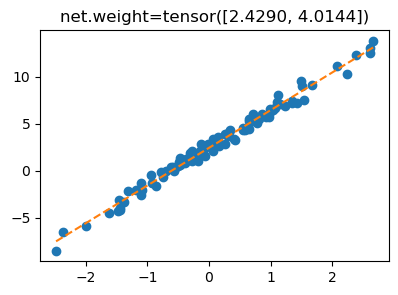

In [203]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data,'--')
plt.title(f'net.weight={net.weight.data.reshape(-1)}');

## D. Step4의 수정 -- `optimizer`의 이용 

`-` 소망: 아래의 과정을 좀 더 편하게 했으면.. 

```Python
net.weight.data = net.weight.data - 0.1 * net.weight.grad
net.weight.data = None 
```

`# optimizer` -- 이걸 이용하면 update 과정을 손쉽게 할 수 있음 

***기존코드***

In [204]:
## -- 준비과정 -- ## 
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()

In [205]:
## -- 1에폭진행 -- ## 
# step1: 
yhat = net(X)
# step2: loss
loss = loss_fn(yhat,y)
# step3: 미분
loss.backward()
# step4: update
print(net.weight.data)
net.weight.data = net.weight.data - 0.1 * net.weight.grad
print(net.weight.data)
net.weight.grad = None

tensor([[-5., 10.]])
tensor([[-3.6577,  8.8111]])


In [206]:
## -- 2에폭진행 -- ## 
# step1: 2에폭진행
yhat = net(X)
# step2: loss
loss = loss_fn(yhat,y)
# step3: 미분
loss.backward()
# step4: update
print(net.weight.data)
net.weight.data = net.weight.data - 0.1 * net.weight.grad
print(net.weight.data)
net.weight.grad = None

tensor([[-3.6577,  8.8111]])
tensor([[-2.5548,  7.8612]])


***새로운코드*** -- `optimizer` 이용

🗣️(

- torch.optim.SGD : optimizer를 만들어줌
- torch.optim.SGD는 net.weight를 갖고 있어야 함(What)
    - net.weight는 net.parameters()로 볼 수 있음
    - net.parameters()는 generator: iterable object -> list화 가능
- torch.optim.SGD는 학습률 lr도 갖고 있어야 함

In [208]:
net.weight

Parameter containing:
tensor([[-2.5548,  7.8612]], requires_grad=True)

In [209]:
net.parameters()

<generator object Module.parameters at 0x7fc922ade820>

In [210]:
list(net.parameters()) # 값을 보려면

[Parameter containing:
 tensor([[-2.5548,  7.8612]], requires_grad=True)]

In [212]:
# optimizr = torch.optim.SGD(net.parameters(), lr=0.1) # net.parameters(): generator

- net.weight.data = net.weight.data - 0.1 * net.weight.grad
    - => optimizr.step()
- net.weight.grad = None
    - => optimizr.zero_grad()

)🗣️

In [213]:
## -- 준비과정 -- ## 
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)

In [214]:
## -- 1에폭진행 -- ## 
yhat = net(X)
# step2: loss
loss = loss_fn(yhat,y)
# step3: 미분
loss.backward()
# step4: update
print(net.weight.data)
#net.weight.data = net.weight.data - 0.1 * net.weight.grad
optimizr.step()
print(net.weight.data)
#net.weight.grad = None
optimizr.zero_grad()

tensor([[-5., 10.]])
tensor([[-3.6577,  8.8111]])


In [215]:
## -- 2에폭진행 -- ## 
yhat = net(X)
# step2: loss
loss = loss_fn(yhat,y)
# step3: 미분
loss.backward()
# step4: update
print(net.weight.data)
#net.weight.data = net.weight.data - 0.1 * net.weight.grad
optimizr.step()
print(net.weight.data)
#net.weight.grad = None
optimizr.zero_grad()

tensor([[-3.6577,  8.8111]])
tensor([[-2.5548,  7.8612]])


`#`

`-` 수정된코드 

In [216]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비 
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)
for epoc in range(30):
    # step1: yhat 
    yhat = net(X)
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    optimizr.step()
    optimizr.zero_grad()

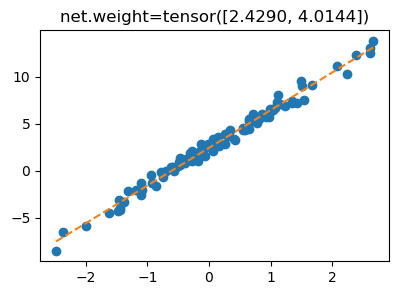

In [217]:
plt.plot(x,y,'o')
plt.plot(x,yhat.data,'--')
plt.title(f'net.weight={net.weight.data.reshape(-1)}');